Initialize the environment

In [1]:
from TamGen_Demo import TamGenDemo, prepare_pdb_data
import os

os.environ["CUDA_VISIBLE_DEVICES"] = "0"

worker = TamGenDemo(
    data="./TamGen_Demo_Data",
    ckpt="checkpoints/crossdock_pdb_A10/checkpoint_best.pt",
    use_conditional=True
)

Namespace(no_progress_bar=False, log_interval=1000, log_format=None, tensorboard_logdir='', tbmf_wrapper=False, seed=1, cpu=False, fp16=False, memory_efficient_fp16=False, fp16_init_scale=128, fp16_scale_window=None, fp16_scale_tolerance=0.0, min_loss_scale=0.0001, threshold_loss_scale=None, user_dir=None, criterion='cross_entropy', tokenizer=None, bpe=None, optimizer='nag', lr_scheduler='fixed', task='translation_coord', num_workers=1, skip_invalid_size_inputs_valid_test=False, max_tokens=1024, max_sentences=None, required_batch_size_multiple=8, dataset_impl=None, gen_subset='gen_8fln', num_shards=1, shard_id=0, path='checkpoints/crossdock_pdb_A10/checkpoint_best.pt', remove_bpe=None, quiet=False, model_overrides='{}', results_path=None, beam=20, nbest=20, max_len_a=0, max_len_b=200, min_len=1, match_source_len=False, no_early_stop=False, unnormalized=False, no_beamable_mm=False, lenpen=1, unkpen=0, replace_unk=None, sacrebleu=False, score_reference=False, prefix_size=0, prefix_string

Set the PDB you want to generate cmpds

In [2]:
pdb_id = "7te0" # "5dzk, 7d1m" "7te0"
prepare_pdb_data(pdb_id,)
worker.reload_data(subset="gen_" + pdb_id.lower())

hyps, ref = worker.sample(
    m_sample=5000, 
    maxseed=30,
)

7te0 is downloaded
| loaded 1 examples from: ./TamGen_Demo_Data/gen_7te0.tg-m1.tg
| loaded 1 examples from: ./TamGen_Demo_Data/gen_7te0.tg-m1.m1
| ./TamGen_Demo_Data gen_7te0 tg-m1 1 examples
| loaded 1 examples from: ./TamGen_Demo_Data/gen_7te0.tg-m1.tg.coord


 97%|█████████▋| 29/30 [00:40<00:01,  1.38s/it]


Visualize the molecules

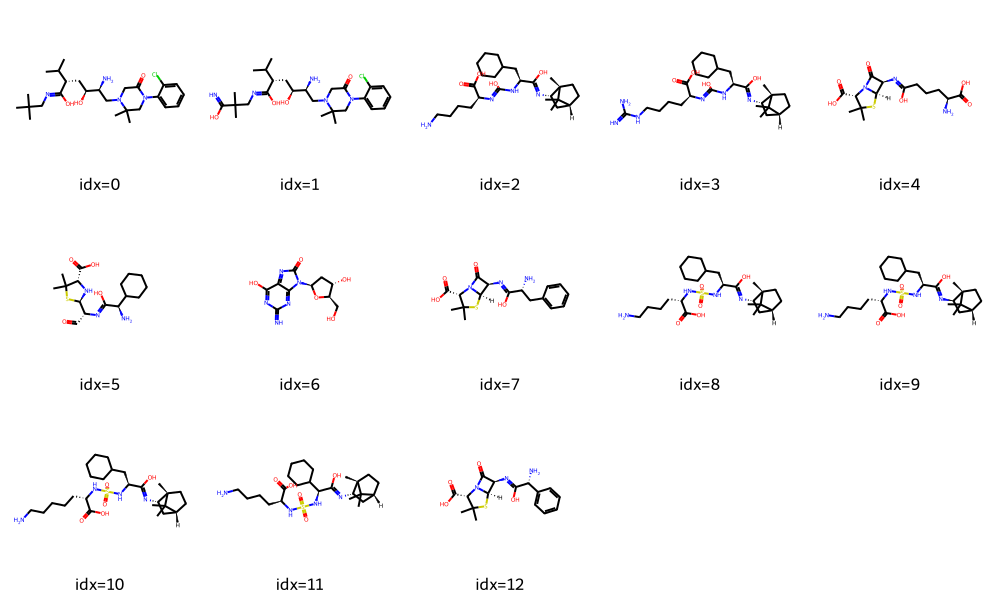

In [4]:
from rdkit import Chem 
from rdkit.Chem import Draw, AllChem, DataStructs
from rdkit.Chem import MACCSkeys

fp_ref = MACCSkeys.GenMACCSKeys(ref)

gens = []

for k,v in hyps.items():
    fp = MACCSkeys.GenMACCSKeys(v)
    similarity = DataStructs.FingerprintSimilarity(fp_ref, fp, metric=DataStructs.TanimotoSimilarity)
    gens.append((v,k, similarity))

sorted_gen = sorted(gens, key=lambda e: e[-1], reverse=True)

# img=Draw.MolsToGridImage([e[0] for e in sorted_gen], molsPerRow=5, legends=["idx={}, morgan={:.2f}".format(ii, e[2]) for ii, e in enumerate(sorted_gen)])
img=Draw.MolsToGridImage([e[0] for e in sorted_gen], molsPerRow=5, legends=["idx={}".format(ii) for ii in range(len(sorted_gen))])
img